In [2]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from models.Loader import load_model
from utils.shap_tools import ChronoSHAP
from models.Wrappers import Transformer_wrapper, Reduced_transformer_wrapper, Reduced_io_transformer_wrapper, Reduced_o_DLinear_wrapper
from torch.autograd import Variable
from cycler import cycler

# import argparse
import os
import torch
# import copy
# from exp.exp_main import Exp_Main
# import random
import numpy as np

import shap
import pickle
import warnings

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error


%matplotlib qt5 
# %matplotlib widget
%matplotlib inline

warnings.filterwarnings('ignore', message='.*unrecognized nn.Module: LayerNorm.*')


In [36]:
import pandas as pd 

data_path = "dataset/"
datasets = dict()

# data_files = os.listdir(data_path)
# data_files.remove("all_six_datasets.zip")
# print(len(data_files))

dataset_key = "national_illness"
# for f in ["electricity.csv", "ETTh1.csv", "ETTh2.csv", "ETTm1.csv", "ETTm2.csv", "exchange_rate.csv", "national_illness.csv", "traffic.csv", "weather.csv"]:
for f in ["{}.csv".format(dataset_key)]:
    print(f.replace(".csv",""))        
    dataset = pd.read_csv(data_path+f)
#     display(dataset.describe())
    datasets[f.replace(".csv","")] = dataset

national_illness


date                  object
% WEIGHTED ILI       float64
%UNWEIGHTED ILI      float64
AGE 0-4                int64
AGE 5-24               int64
ILITOTAL               int64
NUM. OF PROVIDERS      int64
OT                     int64
dtype: object


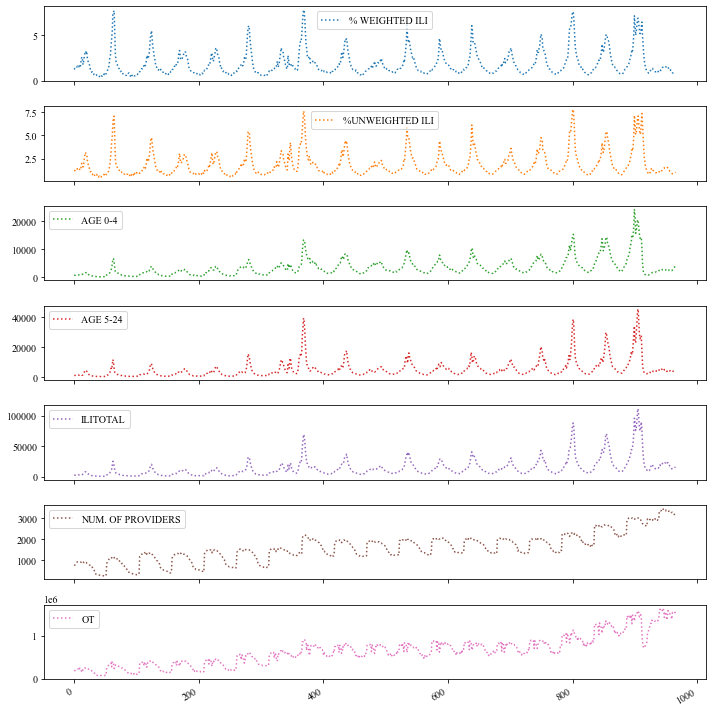

In [37]:
dset = datasets[dataset_key]
print(dset.dtypes)

# %matplotlib inline 
datasets[dataset_key].plot(subplots=True, figsize=(10, 10))
plt.tight_layout()
plt.show()

# dset = datasets["exchange_rate"].loc[:, datasets["exchange_rate"].columns != 'date']

Arg use_gpu initial: True
Args in experiment:
Namespace(activation='gelu', batch_size=32, c_out=7, checkpoints='F:\\Transformers old results\\checkpoints', d_ff=2048, d_layers=1, d_model=512, data='custom', data_path='national_illness.csv', dec_in=7, des='Exp', devices='0,1,2,3', distil=True, do_predict=False, dropout=0.05, e_layers=2, embed='timeF', embed_type=0, enc_in=7, factor=3, features='M', freq='h', gpu=0, individual=False, is_training=1, itr=1, label_len=18, learning_rate=0.0001, loss='mse', lradj='type1', model='Transformer', model_id='ili_36', moving_avg=25, n_heads=8, num_workers=0, output_attention=False, patience=3, pred_len=36, root_path='./dataset/', save_pred_values=False, seed=3144, seq_len=36, target='OT', test_flop=False, train_epochs=10, train_only=False, use_amp=False, use_gpu=True, use_multi_gpu=False)
Use GPU: cuda:0
F:\Transformers old results\checkpoints/ili_36_Transformer_custom_ftM_sl36_ll18_pl36_dm512_nh8_el2_dl1_df2048_fc3_ebtimeF_dtTrue_Exp_0_seed3144/che

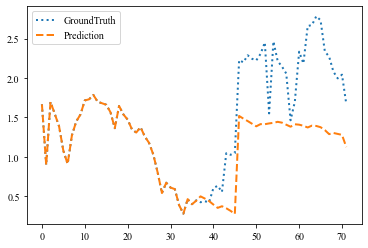

In [38]:
#       "--checkpoints", "F:\Transformers old results\checkpoints",
#       "--seed", "10458", \
model_args = {}

exch_model_args = [
    "--is_training", "1", \
    "--seed", "10458", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("exchange_rate"), \
    "--model_id", "{}_96".format("exchange"), \
    "--model", "Transformer", \
    "--data", "custom", \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "8", \
    "--dec_in", "8", \
    "--c_out", "8", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["exchange_rate"] = exch_model_args

etth1_model_args = [
    "--is_training", "1", \
    "--seed", "12890", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("ETTh1"), \
    "--model_id", "{}_96".format("ETTh1"), \
    "--model", "Transformer", \
    "--data", "{}".format("ETTh1"), \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "7", \
    "--dec_in", "7", \
    "--c_out", "7", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["ETTh1"] = etth1_model_args

etth2_model_args = [
    "--is_training", "1", \
    "--seed", "25565", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("ETTh2"), \
    "--model_id", "{}_96".format("ETTh2"), \
    "--model", "Transformer", \
    "--data", "{}".format("ETTh2"), \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "7", \
    "--dec_in", "7", \
    "--c_out", "7", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["ETTh2"] = etth2_model_args

ettm1_model_args = [
    "--is_training", "1", \
    "--seed", "32598", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("ETTm1"), \
    "--model_id", "{}_96".format("ETTm1"), \
    "--model", "Transformer", \
    "--data", "{}".format("ETTm1"), \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "7", \
    "--dec_in", "7", \
    "--c_out", "7", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["ETTm1"] = ettm1_model_args

ettm2_model_args = [
    "--is_training", "1", \
    "--seed", "15349", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("ETTm2"), \
    "--model_id", "{}_96".format("ETTm2"), \
    "--model", "Transformer", \
    "--data", "{}".format("ETTm2"), \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "7", \
    "--dec_in", "7", \
    "--c_out", "7", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["ETTm2"] = ettm2_model_args

weather_model_args = [
    "--is_training", "1", \
    "--seed", "15227", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("weather"), \
    "--model_id", "{}_96".format("weather"), \
    "--model", "Transformer", \
    "--data", "custom", \
    "--features", "M", \
    "--seq_len", "96", \
    "--label_len", "48", \
    "--pred_len", "96", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "21", \
    "--dec_in", "21", \
    "--c_out", "21", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["weather"] = weather_model_args

ili_model_args = [
    "--is_training", "1", \
    "--seed", "3144", \
    "--num_workers", "0", \
    "--root_path", "./dataset/", \
    "--data_path", "{}.csv".format("national_illness"), \
    "--model_id", "{}_36".format("ili"), \
    "--model", "Transformer", \
    "--data", "custom", \
    "--features", "M", \
    "--seq_len", "36", \
    "--label_len", "18", \
    "--pred_len", "36", \
    "--e_layers", "2", \
    "--d_layers", "1", \
    "--factor", "3", \
    "--enc_in", "7", \
    "--dec_in", "7", \
    "--c_out", "7", \
    "--des", 'Exp', \
    "--itr", "1", \
    "--checkpoints", "F:\Transformers old results\checkpoints"]
model_args["national_illness"] = ili_model_args


dataset_key = "national_illness"
exp, model, setting = load_model(model_args[dataset_key], load=True, return_copy=False)

model.eval()
# model_no_train.eval()

# print("Testing trained model")
exp.test(setting)
# print("Testing untrained model")
# exp_no_train.test(setting_no_train)

# display(model)

# Prepare inputs of the model

In [39]:
train_data, train_loader = exp._get_data("train")
for i, (batch_x_train_b, batch_y_train_b, batch_x_mark_train_b, batch_y_mark_train_b) in enumerate(train_loader):
#     print("i={}, Shapes of batch_x: {}, batch_x_mark: {}, batch_y: {}, batch_y_mark: {}".format(i, batch_x_train_b.shape, batch_x_mark_train_b.shape, batch_y_train_b.shape, batch_y_mark_train_b.shape))
    if (i==0):
        batch_x_train = torch.cat((batch_x_train_b,))
        batch_y_train = torch.cat((batch_y_train_b,))
        batch_x_mark_train = torch.cat((batch_x_mark_train_b,))
        batch_y_mark_train = torch.cat((batch_y_mark_train_b,))
    else:
        batch_x_train = torch.cat((batch_x_train, batch_x_train_b))
        batch_y_train = torch.cat((batch_y_train, batch_y_train_b))
        batch_x_mark_train = torch.cat((batch_x_mark_train, batch_x_mark_train_b))
        batch_y_mark_train = torch.cat((batch_y_mark_train, batch_y_mark_train_b))

batch_x_train = batch_x_train.float().to(next(model.parameters()).device)
batch_y_train = batch_y_train.float().to(next(model.parameters()).device)
batch_x_mark_train = batch_x_mark_train.float().to(next(model.parameters()).device)
batch_y_mark_train = batch_y_mark_train.float().to(next(model.parameters()).device)

# dec_inp_train = torch.zeros_like(batch_y_train[:, -train_data.pred_len:, :]).float()
# dec_inp_train = torch.cat([batch_y_train[:, :train_data.label_len, :], dec_inp_train], dim=1).float().to(next(model.parameters()).device)

dec_inp_train = torch.zeros([batch_y_train.shape[0], train_data.pred_len, batch_y_train.shape[2]]).float().to(batch_y_train.device)
dec_inp_train = torch.cat([batch_y_train[:, :train_data.label_len, :], dec_inp_train], dim=1).float().to(next(model.parameters()).device)

print("Model input shapes: batch_x: {}, batch_x_mark: {}, dec_inp: {}, batch_y_mark: {}".format(batch_x_train.shape, batch_x_mark_train.shape, dec_inp_train.shape, batch_y_mark_train.shape))

train 605
Model input shapes: batch_x: torch.Size([576, 36, 7]), batch_x_mark: torch.Size([576, 36, 4]), dec_inp: torch.Size([576, 54, 7]), batch_y_mark: torch.Size([576, 54, 4])


In [40]:
pred_data, pred_loader = exp._get_data("pred")

for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(pred_loader):
    print("Shapes of batch_x: {}, batch_x_mark: {}, batch_y: {}, batch_y_mark: {}".format(batch_x.shape, batch_x_mark.shape, batch_y.shape, batch_y_mark.shape))
#     print("batch_x: ",batch_x[0,:,0])
#     print("batch_y: ",batch_y[0,:,0])
    print()

batch_x = batch_x.float().to(next(model.parameters()).device)
batch_y = batch_y.float().to(next(model.parameters()).device)
batch_x_mark = batch_x_mark.float().to(next(model.parameters()).device)
batch_y_mark = batch_y_mark.float().to(next(model.parameters()).device)

dec_inp = torch.zeros([batch_y.shape[0], pred_data.pred_len, batch_y.shape[2]]).float().to(batch_y.device)
dec_inp = torch.cat([batch_y[:, :pred_data.label_len, :], dec_inp], dim=1).float().to(next(model.parameters()).device)

print("Model input shapes: batch_x: {}, batch_x_mark: {}, dec_inp: {}, batch_y_mark: {}".format(batch_x.shape, batch_x_mark.shape, dec_inp.shape, batch_y_mark.shape))

pred 1
Shapes of batch_x: torch.Size([1, 36, 7]), batch_x_mark: torch.Size([1, 36, 4]), batch_y: torch.Size([1, 18, 7]), batch_y_mark: torch.Size([1, 54, 4])

Model input shapes: batch_x: torch.Size([1, 36, 7]), batch_x_mark: torch.Size([1, 36, 4]), dec_inp: torch.Size([1, 54, 7]), batch_y_mark: torch.Size([1, 54, 4])


# Reduced inputs and outputs model

In [41]:
device = torch.device('cpu')

# Create list to identify feature and position in the input sequence
feature_list = []
for i in range(exp.args.c_out*exp.args.seq_len):
    feature_list.append("Feature {}, seq pos {} ".format(pred_data.cols[1:][i%exp.args.c_out], int(i/exp.args.c_out)))

## DeepSHAP explainer (based on DeepLift)

### For whole training set

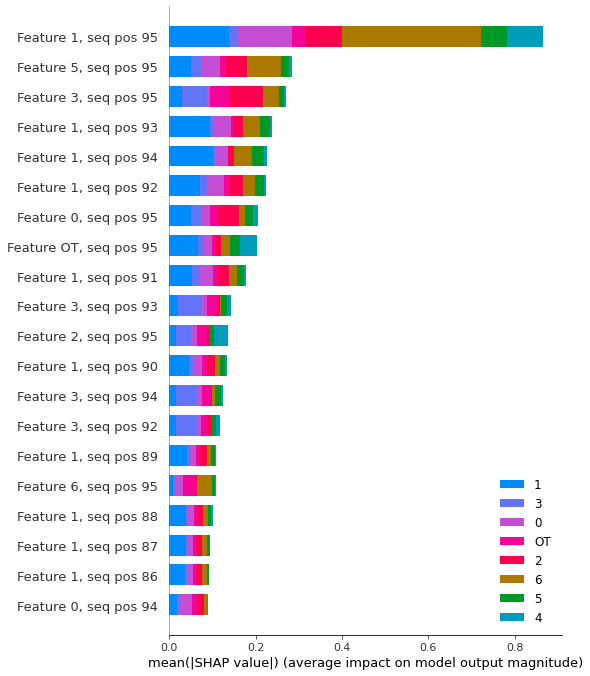

In [19]:
# Get a subset of the train data
batch_x_train_sub = batch_x_train[::50,:,:]

# Flatten X to be fed to the model
reduced_new_input = batch_x.flatten(start_dim=1).to(device)
reduced_new_input_train = batch_x_train_sub.flatten(start_dim=1).to(device)

# X converted to numpy for SHAP masker
reduced_new_input_train_np = reduced_new_input_train.cpu().detach().numpy()
reduced_new_input_np = reduced_new_input.cpu().detach().numpy()

# Define global variables for the wrapper to use
global_batch_x_mark = batch_x_mark.to(device)
global_batch_y_mark = batch_y_mark.to(device)
pred_hor_explained = 0

reduced_io_wrapped_model = Reduced_io_transformer_wrapper(exp.args, global_batch_x_mark, 
                                                          global_batch_y_mark, device, 
                                                          pred_hor_explained).float()
reduced_io_wrapped_model.load_state_dict(model.state_dict())
reduced_io_wrapped_model.eval()

# Set common device
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
exp.device = device
reduced_io_wrapped_model.to(device)

torch.set_grad_enabled(True)

e = shap.DeepExplainer(reduced_io_wrapped_model, reduced_new_input_train)
reduced_io_deep_shap_values = e.shap_values(reduced_new_input)
shap.summary_plot(reduced_io_deep_shap_values, reduced_new_input, feature_names=feature_list, class_names=pred_data.cols[1:][:])

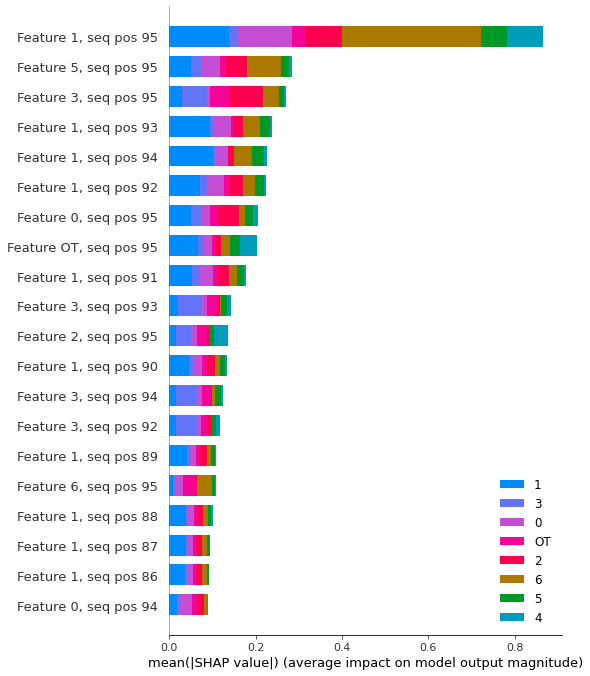

In [20]:
shap.summary_plot(reduced_io_deep_shap_values, reduced_new_input, feature_names=feature_list, class_names=pred_data.cols[1:][:])

### Deep SHAP for full time horizon

In [42]:
num_train_samples = 50
batch_x_train_sub = batch_x_train[::round(batch_x_train.shape[0]/num_train_samples+0.5),:,:]
batch_x_train_sub.shape

torch.Size([48, 36, 7])

In [45]:
num_train_samples = 50

if dataset_key == "national_illness":
    num_train_samples = batch_x_train.shape[0]

# Get a subset of the train data
batch_x_train_sub = batch_x_train[::round(batch_x_train.shape[0]/num_train_samples+0.5),:,:]

device = torch.device('cpu')

# Flatten X to be fed to the model
reduced_new_input = batch_x.flatten(start_dim=1).to(device)
reduced_new_input_train = batch_x_train_sub.flatten(start_dim=1).to(device)

# X converted to numpy for SHAP masker
reduced_new_input_train_np = reduced_new_input_train.cpu().detach().numpy()
reduced_new_input_np = reduced_new_input.cpu().detach().numpy()

# Define global variables for the wrapper to use
global_batch_x_mark = batch_x_mark.to(device)
global_batch_y_mark = batch_y_mark.to(device)
pred_hor_explained = 0

reduced_io_wrapped_model = Reduced_io_transformer_wrapper(exp.args, global_batch_x_mark, 
                                                          global_batch_y_mark, device, 
                                                          pred_hor_explained).float()
reduced_io_wrapped_model.load_state_dict(model.state_dict())
reduced_io_wrapped_model.eval()

# Set common device
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
exp.device = device
reduced_io_wrapped_model.to(device)

torch.set_grad_enabled(True)

e = shap.DeepExplainer(reduced_io_wrapped_model, reduced_new_input_train)

# Each explained prediction horizon has to be analyzed individually to make it work with SHAP, so we store them in a list
# reduced_deep_shap_values = []

# for pred_hor in range(reduced_io_wrapped_model.pred_len):
#     print("Analyzing time step ",pred_hor)
#     reduced_io_wrapped_model.set_pred_time_step(pred_hor)
#     reduced_deep_shap_values.append(e.shap_values(reduced_new_input))

Analyzing time step  0
Analyzing time step  1
Analyzing time step  2


Analyzing time step  3
Analyzing time step  4
Analyzing time step  5


Analyzing time step  6
Analyzing time step  7
Analyzing time step  8


Analyzing time step  9
Analyzing time step  10
Analyzing time step  11


Analyzing time step  12
Analyzing time step  13
Analyzing time step  14


Analyzing time step  15
Analyzing time step  16
Analyzing time step  17


Analyzing time step  18
Analyzing time step  19
Analyzing time step  20


Analyzing time step  21
Analyzing time step  22
Analyzing time step  23


Analyzing time step  24
Analyzing time step  25
Analyzing time step  26


Analyzing time step  27
Analyzing time step  28
Analyzing time step  29


Analyzing time step  30
Analyzing time step  31
Analyzing time step  32


Analyzing time step  33
Analyzing time step  34
Analyzing time step  35


In [44]:
"Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)

'Explanations/SHAP/shap_values_national_illness_in_36_out_36_Transformer_bg_576.pkl'

In [46]:
# with open("Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples), 'wb') as file:
#     pickle.dump(reduced_deep_shap_values, file)

with open("Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples), 'rb') as file:
    reduced_deep_shap_values = pickle.load(file)

time step 0


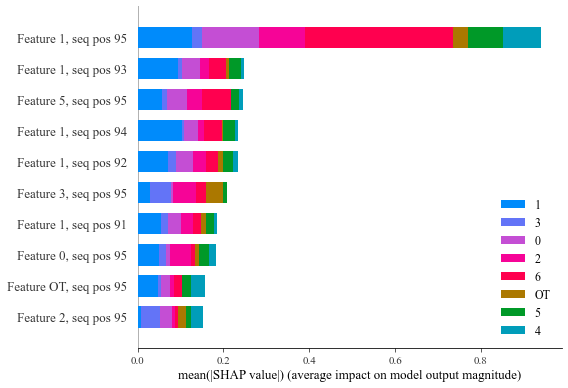

time step 18


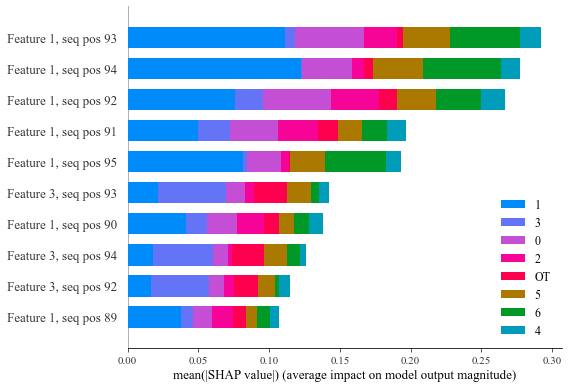

time step 34


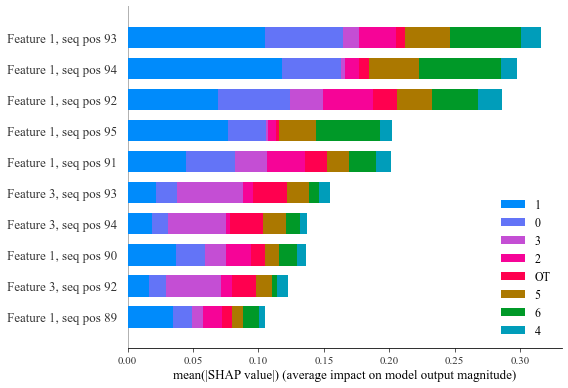

time step 35


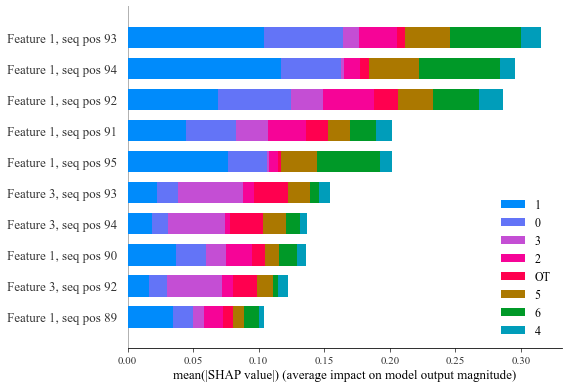

In [12]:
%matplotlib inline

for ind in [0, 18, 34, 35]:
    print("time step {}".format(ind))
    shap.summary_plot(reduced_deep_shap_values[ind], reduced_new_input, feature_names=feature_list, class_names=pred_data.cols[1:][:], max_display=10)

# print("asd")
# shap.summary_plot(reduced_deep_shap_values[0], reduced_new_input, feature_names=feature_list, class_names=pred_data.cols[1:][:], max_display=10)
# print("asdasd")
# shap.summary_plot(reduced_deep_shap_values[95], reduced_new_input, feature_names=feature_list, class_names=pred_data.cols[1:][:], max_display=10)

Input/output mode
accum_signals.shape (96, 96)


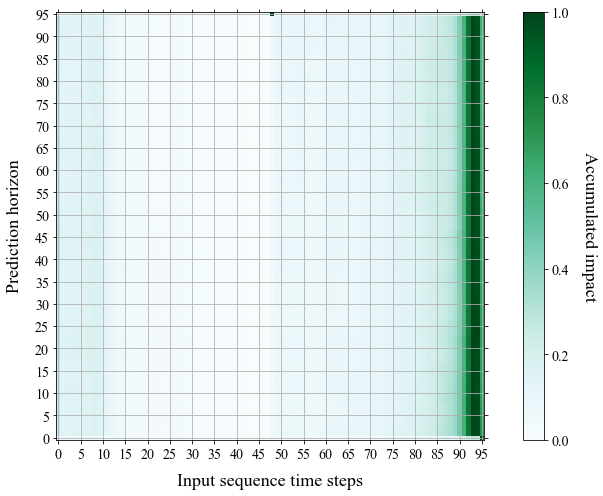

In [13]:
%matplotlib inline 
# %matplotlib qt5

# matplotlib.use('Qt5Agg')
custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
                 cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                                   (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
plt.rc('axes', prop_cycle=custom_cycler)

pred_hor = 0
out_feat = 0
mode = 1
path = "figures"
fig_name = "\\shap_overview_{}_in_{}_out_{}_{}_bg_{}.pdf".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
figsize = (11,7)
save = 1

ChronoSHAP(reduced_deep_shap_values, exp.args.seq_len, 
                       exp.args.c_out, pred_data.cols[1:], mode, pred_hor, out_feat, grid=1, save=save, path=path+fig_name, figsize=figsize)




Output mode


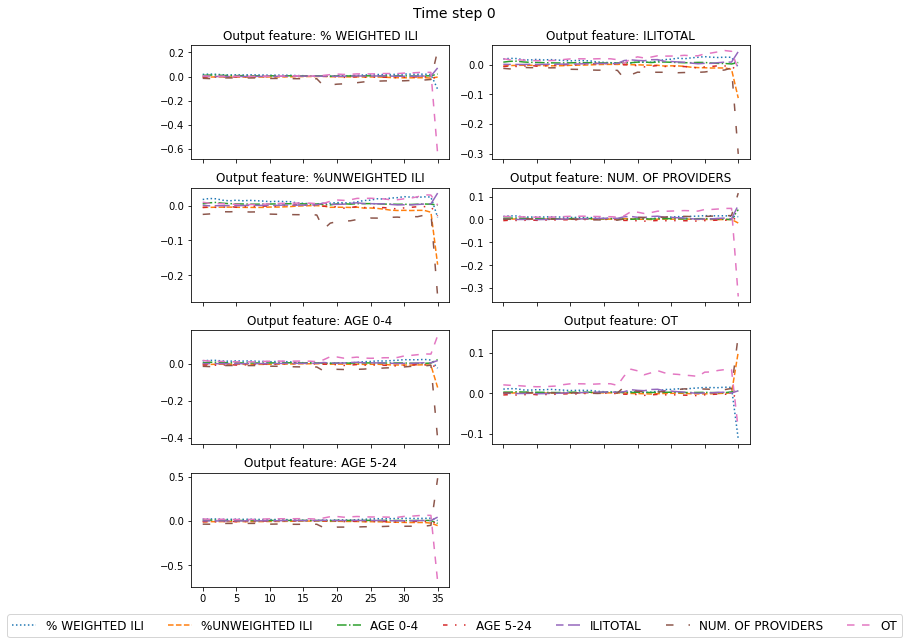

Output mode


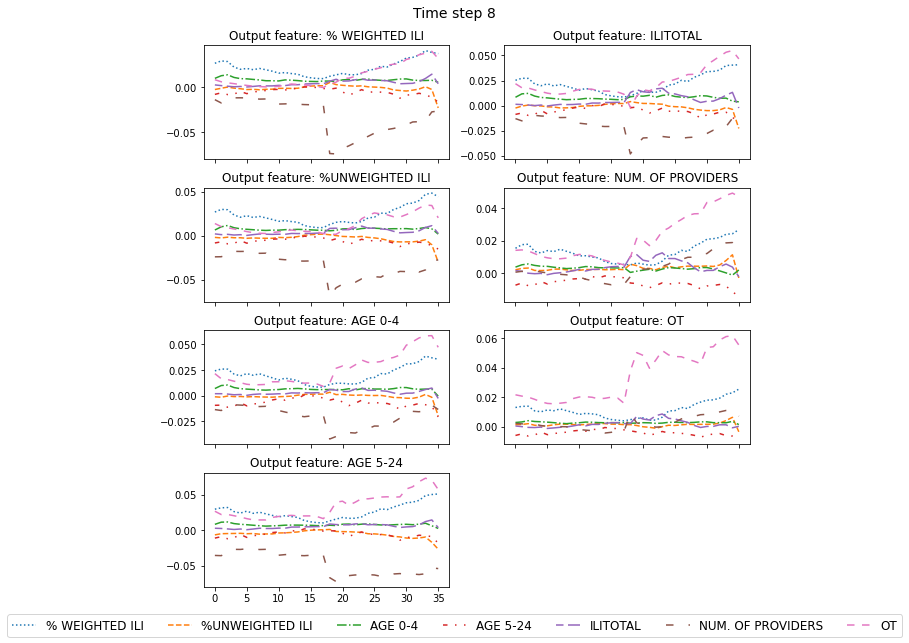

Output mode


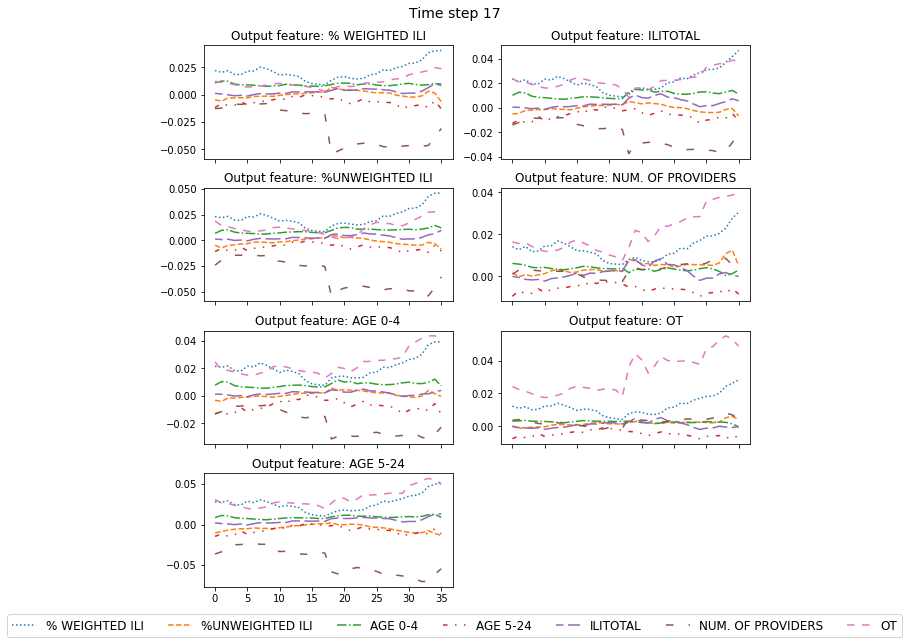

Output mode


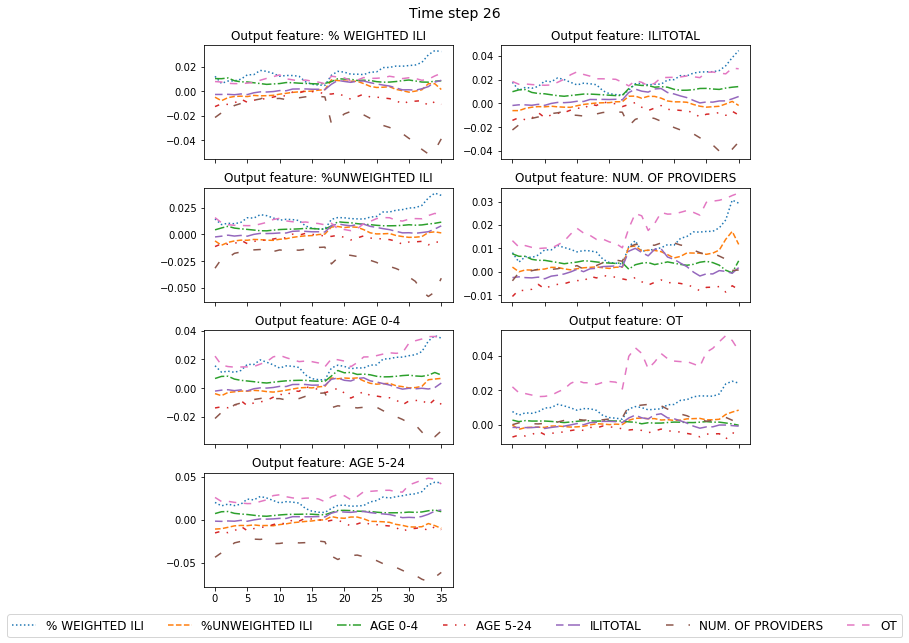

Output mode


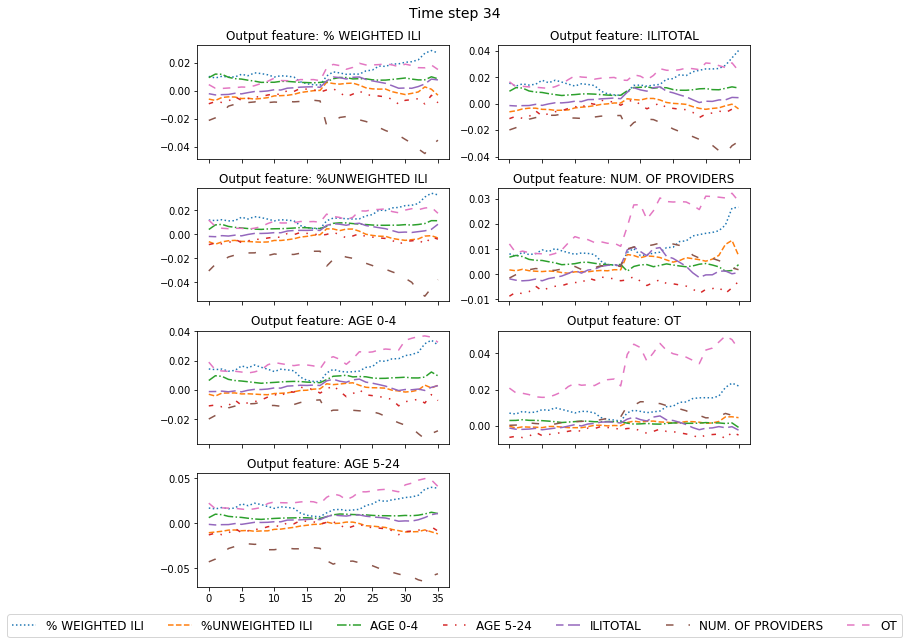

Output mode


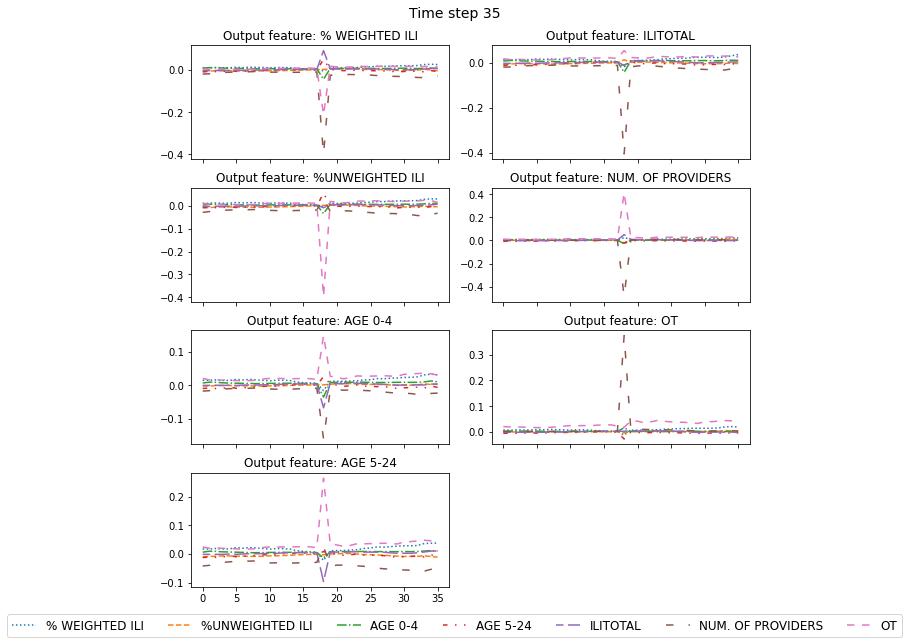

In [14]:
# %matplotlib qt5
%matplotlib inline

custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
                 cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                                   (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
plt.rc('axes', prop_cycle=custom_cycler)

out_feat = 0
mode = 0
save = 1
path = "figures"
figsize=(8.5, 9)

# for pred_hor in np.linspace(0,95, 6):
for pred_hor in [0, 8, 17, 26, 34, 35]:
# for pred_hor in [0]:
    fig_name = "\\shap_pred_hor_{}_{}_in_{}_out_{}_{}_bg_{}.pdf".format(int(pred_hor), dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
    ChronoSHAP(reduced_deep_shap_values, exp.args.seq_len, 
                       exp.args.c_out, pred_data.cols[1:], mode, int(pred_hor), out_feat, custom_cycler, grid=0, save=save, path=path+fig_name, figsize=figsize)


### Remove outliers for better visualization

In [16]:
signals = np.asarray(reduced_deep_shap_values).squeeze()
signals = signals.reshape((signals.shape[0], signals.shape[1], exp.args.seq_len, exp.args.c_out))
# accum_signals = np.sum(np.abs(signals), axis=(1,3))
display(signals.shape)

display(signals[35,:,18,:])
print(abs(signals[35,:,18,:]).sum())

display(signals[0,:,35,:])
print(abs(signals[0,:,35,:]).sum())

(36, 7, 36, 7)

array([[-0.00466684,  0.00310622, -0.04340319,  0.05046995,  0.09226171,
        -0.39745188, -0.21131903],
       [-0.0034933 ,  0.00303799, -0.03322104,  0.05645809, -0.00751512,
         0.03401427, -0.39649871],
       [-0.01642776,  0.00070769, -0.03566872,  0.02567429, -0.06803843,
        -0.16127281,  0.14801587],
       [-0.02257062, -0.0028862 , -0.01348162,  0.00861164, -0.0959945 ,
         0.02588365,  0.26463667],
       [-0.01803559,  0.01442208, -0.04118742, -0.00974661, -0.01015569,
        -0.40586913,  0.05549034],
       [ 0.02533796, -0.02196361, -0.02889045, -0.0219835 ,  0.05052144,
        -0.48429298,  0.40983793],
       [-0.01231794, -0.00377879,  0.01603236, -0.02775221,  0.00229387,
         0.37412965,  0.0178517 ]])

4.278679064416792


array([[-0.10559146, -0.00434137,  0.02091721, -0.01473277,  0.0715643 ,
         0.21599355, -0.6434117 ],
       [-0.03343716, -0.16973454,  0.00171936, -0.02957633,  0.03642762,
        -0.26121134,  0.00211628],
       [-0.02344114, -0.12779349,  0.02323359, -0.01999166,  0.01756933,
        -0.40592721,  0.15243691],
       [ 0.00465724, -0.0519    , -0.02748855, -0.03004705,  0.04348302,
         0.48223087, -0.68191159],
       [-0.00860941, -0.1126094 ,  0.00696605, -0.02274618,  0.04344104,
        -0.30047083, -0.01617198],
       [ 0.0117675 , -0.01577001,  0.04300293,  0.01215305,  0.06216003,
         0.11511241, -0.33750671],
       [-0.11288297,  0.10157534,  0.0061923 , -0.01084882,  0.00600616,
         0.14200081, -0.08862266]])

5.279503232217394


In [17]:
with open("Explanations/SHAP/shap_values_{}_in_{}_out_{}_{}_bg_{}.pkl".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples), 'rb') as file:
    filtered_reduced_deep_shap_values = pickle.load(file)
    
anom = 35

print("Anomaly 1")
for i in range(len(filtered_reduced_deep_shap_values[anom])):
#     print(filtered_reduced_deep_shap_values[anom][i][:,48*exp.args.c_out:49*exp.args.c_out].shape)
#     print(np.mean([filtered_reduced_deep_shap_values[anom][i][:,47*exp.args.c_out:48*exp.args.c_out], 
#                    filtered_reduced_deep_shap_values[anom][i][:,49*exp.args.c_out:50*exp.args.c_out], 
#                    filtered_reduced_deep_shap_values[anom-1][i][:,48*exp.args.c_out:49*exp.args.c_out]], axis=0).shape)
    filtered_reduced_deep_shap_values[anom][i][:,18*exp.args.c_out:19*exp.args.c_out] = np.mean([filtered_reduced_deep_shap_values[anom][i][:,17*exp.args.c_out:18*exp.args.c_out], 
                                                                       filtered_reduced_deep_shap_values[anom][i][:,19*exp.args.c_out:20*exp.args.c_out], 
                                                                       filtered_reduced_deep_shap_values[anom-1][i][:,18*exp.args.c_out:19*exp.args.c_out]], 
                                                                      axis=0)

anom = 0
print("Anomaly 2")
for i in range(len(filtered_reduced_deep_shap_values[anom])):
#     print(filtered_reduced_deep_shap_values[anom][i].shape)
#     i[:,95*exp.args.c_out:96*exp.args.c_out] = np.mean([i[:,95*exp.args.c_out:96*exp.args.c_out],i[:,95*exp.args.c_out:96*exp.args.c_out]], axis=0)
    filtered_reduced_deep_shap_values[anom][i][:,35*exp.args.c_out:36*exp.args.c_out] = np.mean([filtered_reduced_deep_shap_values[anom][i][:,34*exp.args.c_out:35*exp.args.c_out], 
                                                                       filtered_reduced_deep_shap_values[anom+1][i][:,35*exp.args.c_out:36*exp.args.c_out]], 
                                                                      axis=0)

Anomaly 1
Anomaly 2


In [18]:
signals = np.asarray(filtered_reduced_deep_shap_values).squeeze()
signals = signals.reshape((signals.shape[0], signals.shape[1], exp.args.seq_len, exp.args.c_out))
# accum_signals = np.sum(np.abs(signals), axis=(1,3))
display(signals.shape)

display(signals[35,:,18,:])
print(abs(signals[35,:,18,:]).sum())

display(signals[0,:,35,:])
print(abs(signals[0,:,35,:]).sum())

(36, 7, 36, 7)

array([[ 0.00894123,  0.00376546,  0.00646281,  0.0012446 ,  0.00552362,
        -0.01962875,  0.01414014],
       [ 0.00975138,  0.00251116,  0.00602287,  0.00060891,  0.00557544,
        -0.02294093,  0.01619162],
       [ 0.00985264,  0.00250351,  0.00646221,  0.00107798,  0.00510044,
        -0.01346571,  0.02137441],
       [ 0.01023439,  0.00028211,  0.00669217,  0.00148612,  0.00630842,
        -0.03769028,  0.02875085],
       [ 0.00879453,  0.00230653,  0.00817619,  0.00177253,  0.0071262 ,
        -0.01573337,  0.02079822],
       [ 0.00669154,  0.00492039,  0.00251942, -0.0012003 ,  0.00749598,
         0.00540341,  0.01942078],
       [ 0.00532994,  0.00127145,  0.00165083, -0.00116761,  0.00364006,
         0.00756862,  0.03490039]])

0.44247840708430886


array([[ 2.01563686e-02, -2.37577846e-02,  2.27456400e-03,
        -1.39709332e-02,  1.17827195e-03, -2.64355801e-02,
         3.06903990e-02],
       [ 2.54470203e-02, -3.03849885e-02, -1.37105747e-03,
        -1.07075784e-02,  5.38400607e-04, -2.10197121e-02,
         2.32326183e-02],
       [ 2.00681379e-02, -1.88750550e-02, -2.23245844e-03,
        -1.65469993e-02, -2.09315261e-03, -8.10961402e-03,
         4.75815386e-02],
       [ 3.23285609e-02, -3.28583606e-02,  1.75813661e-03,
        -1.55054883e-02, -2.15508044e-05, -5.30598462e-02,
         5.98164685e-02],
       [ 2.41650380e-02, -2.72375206e-02, -1.53820496e-04,
        -1.47013180e-02,  3.61229293e-04, -1.06185400e-02,
         4.08321954e-02],
       [ 1.49130840e-02, -4.44645420e-03,  3.55783716e-03,
        -7.16928276e-03, -1.04883709e-03,  1.76136727e-02,
         4.96545229e-02],
       [ 1.77526767e-02, -2.17118647e-03,  2.19557853e-03,
        -4.99791815e-03, -2.12219573e-03,  1.03546884e-02,
         5.8585498

0.8566737399669364


Input/output mode
accum_signals.shape (36, 36)


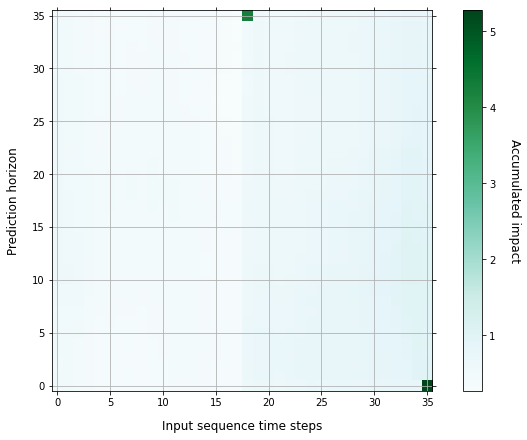

Input/output mode
accum_signals.shape (36, 36)


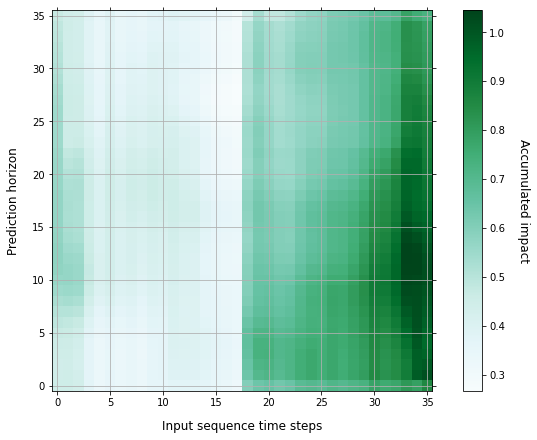

In [19]:
%matplotlib inline 
# %matplotlib qt5

# matplotlib.use('Qt5Agg')
custom_cycler = (cycler(color=plt.rcParams['axes.prop_cycle'].by_key()['color'][:8]) + 
                 cycler(linestyle=['dotted', 'dashed', 'dashdot', (0, (3, 5, 1, 5, 1, 5)), 
                                   (5, (10, 3)), (0, (5, 10)), (0, (5, 5)), (0, (5, 1))]))
plt.rc('axes', prop_cycle=custom_cycler)

pred_hor = 0
out_feat = 0
mode = 1
save = 1
path = "figures"
fig_name = "\\shap_overview_{}_in_{}_out_{}_{}_bg_{}.pdf".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
figsize = (11,7)

ChronoSHAP(reduced_deep_shap_values, exp.args.seq_len, 
                       exp.args.c_out, pred_data.cols[1:], mode, pred_hor, out_feat, grid=1, save=save, path=path+fig_name, figsize=figsize)


path = "figures"
fig_name = "\\shap_overview_{}_in_{}_out_{}_{}_bg_{}_no_outliers.pdf".format(dataset_key, exp.args.seq_len, exp.args.pred_len, exp.args.model, num_train_samples)
figsize = (11,7)

ChronoSHAP(filtered_reduced_deep_shap_values, exp.args.seq_len, 
                       exp.args.c_out, pred_data.cols[1:], mode, pred_hor, out_feat, grid=1, save=save, path=path+fig_name, figsize=figsize)



In [25]:
model(batch_x, batch_x_mark, dec_inp, batch_y_mark)

tensor([[[ 6.1507e-01, -1.2287e+00, -7.2011e-02,  8.7379e-01,  7.4863e-02,
          -7.1749e-01,  1.1203e+00,  1.1451e+00],
         [ 6.0026e-01, -1.3929e+00,  1.8149e-02,  7.7930e-01,  1.0900e-01,
          -6.1561e-01,  7.2854e-01,  9.7183e-01],
         [ 5.8116e-01, -1.3461e+00,  9.0808e-03,  7.5828e-01,  1.1202e-01,
          -6.1982e-01,  6.9711e-01,  9.4458e-01],
         [ 5.8789e-01, -1.2466e+00,  2.0215e-02,  7.1803e-01,  1.3135e-01,
          -6.2930e-01,  6.8488e-01,  9.5404e-01],
         [ 6.1863e-01, -1.1455e+00,  2.2719e-02,  6.7707e-01,  1.5055e-01,
          -6.2138e-01,  6.9731e-01,  9.7948e-01],
         [ 6.5272e-01, -1.0895e+00, -2.3657e-03,  6.5557e-01,  1.5585e-01,
          -5.9477e-01,  7.1691e-01,  1.0014e+00],
         [ 6.7905e-01, -1.0819e+00, -3.9206e-02,  6.5549e-01,  1.5068e-01,
          -5.7363e-01,  7.2712e-01,  1.0092e+00],
         [ 6.9971e-01, -1.0940e+00, -6.2686e-02,  6.6170e-01,  1.4845e-01,
          -5.7202e-01,  7.1918e-01,  1.0073e+00],


In [ ]:
pred_data, pred_loader = exp._get_data("pred")

for i, (batch_x, batch_y, batch_x_mark, batch_y_mark) in enumerate(pred_loader):
    print("Shapes of batch_x: {}, batch_x_mark: {}, batch_y: {}, batch_y_mark: {}".format(batch_x.shape, batch_x_mark.shape, batch_y.shape, batch_y_mark.shape))
#     print("batch_x: ",batch_x[0,:,0])
#     print("batch_y: ",batch_y[0,:,0])
    print()

batch_x = batch_x.float().to(next(model.parameters()).device)
aux_batch_x = batch_x.clone().detach()

batch_y = batch_y.float().to(next(model.parameters()).device)
batch_x_mark = batch_x_mark.float().to(next(model.parameters()).device)
batch_y_mark = batch_y_mark.float().to(next(model.parameters()).device)

dec_inp = torch.zeros([batch_y.shape[0], pred_data.pred_len, batch_y.shape[2]]).float().to(batch_y.device)
dec_inp = torch.cat([batch_y[:, :pred_data.label_len, :], dec_inp], dim=1).float().to(next(model.parameters()).device)

print("Model input shapes: batch_x: {}, batch_x_mark: {}, dec_inp: {}, batch_y_mark: {}".format(batch_x.shape, batch_x_mark.shape, dec_inp.shape, batch_y_mark.shape))

In [30]:
aux_batch_x = batch_x.clone().detach()

aux_batch_x[:,:,0] = 0

(model(batch_x, batch_x_mark, dec_inp, batch_y_mark)[:,:,:]-model(aux_batch_x, batch_x_mark, dec_inp, batch_y_mark)[:,:,:]).sum(dim=0)

tensor([[-0.0753, -0.0113, -0.0346,  0.0253, -0.0378, -0.0760, -0.0578, -0.0169],
        [-0.0732, -0.0062, -0.0338,  0.0247, -0.0351, -0.0654, -0.0530, -0.0197],
        [-0.0731, -0.0050, -0.0337,  0.0246, -0.0340, -0.0639, -0.0531, -0.0198],
        [-0.0732, -0.0045, -0.0340,  0.0250, -0.0337, -0.0631, -0.0533, -0.0200],
        [-0.0740, -0.0042, -0.0343,  0.0253, -0.0338, -0.0629, -0.0531, -0.0205],
        [-0.0747, -0.0046, -0.0346,  0.0254, -0.0334, -0.0645, -0.0538, -0.0213],
        [-0.0751, -0.0058, -0.0348,  0.0253, -0.0334, -0.0665, -0.0540, -0.0218],
        [-0.0757, -0.0070, -0.0353,  0.0252, -0.0331, -0.0675, -0.0540, -0.0226],
        [-0.0759, -0.0082, -0.0351,  0.0257, -0.0329, -0.0676, -0.0540, -0.0227],
        [-0.0765, -0.0084, -0.0353,  0.0262, -0.0336, -0.0672, -0.0535, -0.0220],
        [-0.0773, -0.0087, -0.0350,  0.0266, -0.0342, -0.0668, -0.0533, -0.0210],
        [-0.0779, -0.0082, -0.0358,  0.0274, -0.0349, -0.0678, -0.0532, -0.0199],
        [-0.0789